In [1]:
from discopy.frobenius import *
import networkx as nx
import yaml

from src import nx_yaml


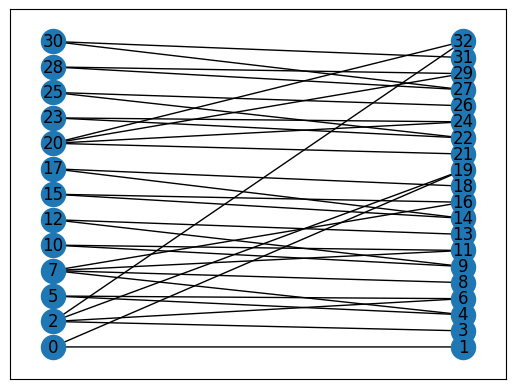

In [2]:
G0 = yaml.compose("""
- a:
    b: c
    d: e
- {c, d}
""", Loader=nx_yaml.NxSafeLoader)
G0 = G0.graph
nodes = {n for n, b in G0.nodes(data="bipartite") if b == 0}
pos = nx.bipartite_layout(G0, nodes=nodes)
nx.draw_networkx(G0, pos=pos)

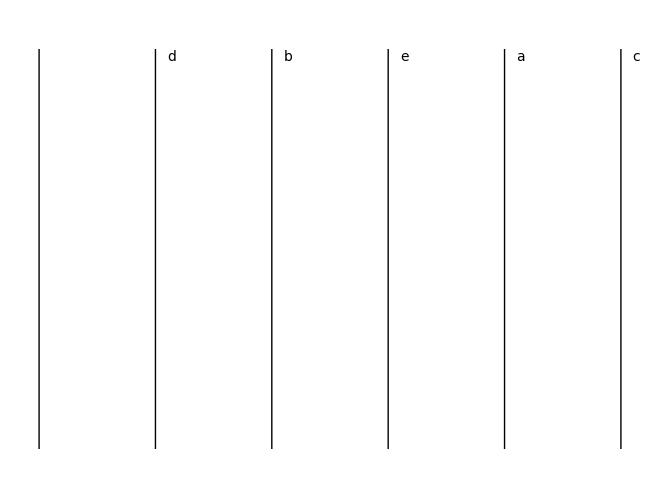

In [6]:
from itertools import combinations

D = Id()
scalar_nodes = {d["value"] for n, d in G0.nodes(data=True) if d["bipartite"] == 0 and d["kind"] == "scalar"}
D = Id(Ty(*scalar_nodes))
D = Id(Ty(*scalar_nodes))
edge_nodes = {n for n, d in G0.nodes(data=True) if d["bipartite"] == 1}
for edge_node in edge_nodes:
    neighbors = [G0.nodes[n]["value"] for n in G0[edge_node] if G0.nodes[n].get("kind") == "scalar"]
    G1.add_edges_from(combinations(neighbors, 2))
# nx.draw_networkx(G2)
# nx.draw_networkx(G1)
D.draw()